# <div align=center>Regression Analysis and Correlators for Suicide Rates</div>

### Prep Work
#### Download the following files at these web addresses:
1) WHO Suicides Rates: https://www.kaggle.com/szamil/who-suicide-statistics

2) UNData Country Statistics: https://www.kaggle.com/sudalairajkumar/undata-country-profiles

3) World happiness scores: https://www.kaggle.com/unsdsn/world-happiness


### Extract all the data into Jupyter notebook

Import the needed libraries

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
import seaborn as sns

Import all our data into dataframes (3 total)

In [2]:
happy = pd.read_csv('Happiness_Scores_2016.csv')
suicide = pd.read_csv('who_suicide_statistics.csv')
undata = pd.read_csv('country_profile_variables.csv')

### Clean Data 

change the name of happy's country to lowercase to work easier together

In [3]:
happy.rename(columns={'Country':'country'}, inplace=True)

set all of the indexes to be country

In [4]:
happy = happy.set_index('country')
suicide = suicide.set_index('country')
undata = undata.set_index('country')

Create a new df to get just the 2015 values

In [5]:
suicide = suicide[suicide.year == 2015]

In [6]:
suicide

,year,sex,age,suicides_no,population
country,,,,,
Albania,2015,female,15-24 years,NaN,212324.0
Albania,2015,female,25-34 years,NaN,199024.0
Albania,2015,female,35-54 years,NaN,400275.0
Albania,2015,female,5-14 years,NaN,168140.0
Albania,2015,female,55-74 years,NaN,289055.0
...,...,...,...,...,...
Virgin Islands (USA),2015,male,25-34 years,2.0,4609.0
Virgin Islands (USA),2015,male,35-54 years,1.0,12516.0
Virgin Islands (USA),2015,male,5-14 years,0.0,7291.0


Use dummy variables so we can get binary variables for their age range and sex

In [7]:
dumDF = pd.get_dummies(suicide, columns=['sex'])

In [8]:
dum = pd.get_dummies(dumDF, columns=['age'])

Drop the male category since it is unneeded (it's the opposite of female category)

In [9]:
dum.drop('sex_male', axis = 1, inplace=True)

In [10]:
dum

,year,suicides_no,population,sex_female,age_15-24 years,age_25-34 years,age_35-54 years,age_5-14 years,age_55-74 years,age_75+ years
country,,,,,,,,,,
Albania,2015,NaN,212324.0,1,1,0,0,0,0,0
Albania,2015,NaN,199024.0,1,0,1,0,0,0,0
Albania,2015,NaN,400275.0,1,0,0,1,0,0,0
Albania,2015,NaN,168140.0,1,0,0,0,1,0,0
Albania,2015,NaN,289055.0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
Virgin Islands (USA),2015,2.0,4609.0,0,0,1,0,0,0,0
Virgin Islands (USA),2015,1.0,12516.0,0,0,0,1,0,0,0
Virgin Islands (USA),2015,0.0,7291.0,0,0,0,0,1,0,0


There is a lot of countries where there is NaN or 0 values for the suicides_no or population, which leaves us with unneeded data points. Therefore, we created a new df without them

In [11]:
df = dum[(dum.suicides_no.isna() == 0) & (dum.population.isna() == 0) & \
    (dum.suicides_no != 0.0) & (dum.population != 0.0)]

In [12]:
df

,year,suicides_no,population,sex_female,age_15-24 years,age_25-34 years,age_35-54 years,age_5-14 years,age_55-74 years,age_75+ years
country,,,,,,,,,,
Antigua and Barbuda,2015,1.0,6403.0,1,0,0,0,0,1,0
Argentina,2015,153.0,3394201.0,1,1,0,0,0,0,0
Argentina,2015,114.0,3235582.0,1,0,1,0,0,0,0
Argentina,2015,166.0,5301368.0,1,0,0,1,0,0,0
Argentina,2015,19.0,3549219.0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
Uruguay,2015,3.0,252509.0,0,0,0,0,1,0,0
Uruguay,2015,133.0,277870.0,0,0,0,0,0,1,0
Uruguay,2015,58.0,78996.0,0,0,0,0,0,0,1


Create a new attribute that finds the suicide rate dividing suicides number by population, then drop the suicides_no and population attributes

In [13]:
df['suicides_per_100k'] = (df.suicides_no / df.population) * 100000

/Users/rossurbina/.conda/envs/ENVIRONMENT/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
df.drop(['suicides_no','population','year'], axis = 1, inplace=True)

/Users/rossurbina/.conda/envs/ENVIRONMENT/lib/python3.7/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Rank the ages in 6 categories, with the lowest value of 1 being the youngest group and the highest value of 6 being the oldest group. Then, drop the other columns to put them all under 1 attribute. This is to easily coompare all ages rather than one at a time

In [15]:
df.loc[df['age_5-14 years']==1, 'age_rank']=1
df.loc[df['age_15-24 years']==1, 'age_rank']=2
df.loc[df['age_25-34 years']==1, 'age_rank']=3
df.loc[df['age_35-54 years']==1, 'age_rank']=4
df.loc[df['age_55-74 years']==1, 'age_rank']=5
df.loc[df['age_75+ years']==1, 'age_rank']=6

/Users/rossurbina/.conda/envs/ENVIRONMENT/lib/python3.7/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/rossurbina/.conda/envs/ENVIRONMENT/lib/python3.7/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/Users/rossurbina/.conda/envs/ENVIRONMENT/lib/python3.7/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a c

In [16]:
df.drop(['age_5-14 years','age_15-24 years','age_25-34 years','age_35-54 years',\
         'age_55-74 years','age_75+ years'], axis = 1, inplace = True)

/Users/rossurbina/.conda/envs/ENVIRONMENT/lib/python3.7/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [17]:
df

,sex_female,suicides_per_100k,age_rank
country,,,
Antigua and Barbuda,1,15.617679,5.0
Argentina,1,4.507688,2.0
Argentina,1,3.523323,3.0
Argentina,1,3.131267,4.0
Argentina,1,0.535329,1.0
...,...,...,...
Uruguay,0,1.188076,1.0
Uruguay,0,47.864109,5.0
Uruguay,0,73.421439,6.0


Create a new happy df that only contains attributes that we want to use

In [18]:
happy = happy[['Happiness Score','Health (Life Expectancy)','Freedom','Trust (Government Corruption)']]

In [19]:
happy

,Happiness Score,Health (Life Expectancy),Freedom,Trust (Government Corruption)
country,,,,
Denmark,7.526,0.79504,0.57941,0.44453
Switzerland,7.509,0.86303,0.58557,0.41203
Iceland,7.501,0.86733,0.56624,0.14975
Norway,7.498,0.79579,0.59609,0.35776
Finland,7.413,0.81091,0.57104,0.41004
...,...,...,...,...
Benin,3.484,0.21028,0.39747,0.06681
Afghanistan,3.360,0.17344,0.16430,0.07112
Togo,3.303,0.24811,0.34678,0.11587


Merge the happy and original df together

In [20]:
x = df.merge(happy, how='left', left_on='country', right_on='country')

In [21]:
x

,sex_female,suicides_per_100k,age_rank,Happiness Score,Health (Life Expectancy),Freedom,Trust (Government Corruption)
country,,,,,,,
Antigua and Barbuda,1,15.617679,5.0,NaN,NaN,NaN,NaN
Argentina,1,4.507688,2.0,6.650,0.69711,0.42284,0.07296
Argentina,1,3.523323,3.0,6.650,0.69711,0.42284,0.07296
Argentina,1,3.131267,4.0,6.650,0.69711,0.42284,0.07296
Argentina,1,0.535329,1.0,6.650,0.69711,0.42284,0.07296
...,...,...,...,...,...,...,...
Uruguay,0,1.188076,1.0,6.545,0.72183,0.54388,0.21394
Uruguay,0,47.864109,5.0,6.545,0.72183,0.54388,0.21394
Uruguay,0,73.421439,6.0,6.545,0.72183,0.54388,0.21394


Create a new undata df that only contains values we care about

In [22]:
undata = undata[['GDP per capita (current US$)', 'Unemployment (% of labour force)', \
            'Labour force participation (female/male pop. %)', 'Health: Total expenditure (% of GDP)', \
            'Education: Government expenditure (% of GDP)', \
            'Seats held by women in national parliaments %',\
            'Individuals using the Internet (per 100 inhabitants)' , \
            'Pop. using improved drinking water (urban/rural, %)',\
            'Sex ratio (m per 100 f, 2017)',\
            'GDP growth rate (annual %, const. 2005 prices)',\
            'Energy supply per capita (Gigajoules)'
]]

In [23]:
undata

,GDP per capita (current US$),Unemployment (% of labour force),Labour force participation (female/male pop. %),Health: Total expenditure (% of GDP),Education: Government expenditure (% of GDP),Seats held by women in national parliaments %,Individuals using the Internet (per 100 inhabitants),"Pop. using improved drinking water (urban/rural, %)","Sex ratio (m per 100 f, 2017)","GDP growth rate (annual %, const. 2005 prices)",Energy supply per capita (Gigajoules)
country,,,,,,,,,,,
Afghanistan,623.2,8.6,19.3/83.6,8.2,3.3,27.7,42,45.1/27.0,106.3,-2.4,78.2/47.0
Albania,3984.2,15.8,40.2/61.0,5.9,3.5,22.9,130,95.5/90.2,101.9,2.6,94.9/95.2
Algeria,4154.1,11.4,17.0/70.7,7.2,...,31.6,135,89.8/82.2,102.0,3.8,84.3/81.8
American Samoa,-99.0,...,.../...,-99.0,-99,-99.0,92,62.5/62.5,103.6,-99,100.0/100.0
Andorra,39896.4,-99,-99,8.1,3.3,32.1,13,100.0/100.0,102.3,0.8,100.0/100.0
...,...,...,...,...,...,...,...,...,...,...,...
Wallis and Futuna Islands,-99.0,-99,-99,-99.0,-99,-99.0,89,-99,93.4,-99,-99
Western Sahara,-99.0,6.8,28.6/83.3,-99.0,-99,-99.0,49,-99,110.1,-99,-99
Yemen,1106.4,16.1,26.2/73.7,5.6,...,0.0,298,92.5/34.1,102.1,-28.1,72.0/46.5


In this dataset, there are multiple values that could represent NaN values (-99 and ...). We need to get rid of those numbers and make them NaN values, so replace them with NaN values

In [24]:
undata1 = undata.replace(to_replace=[-99.0, '-99', '...', '.../...'],value=np.nan)

Rename column names to make them easier to use

In [25]:
undata2 =undata1.rename(columns = { 'GDP per capita (current US$)':'GDP per capita', \
                                   'Unemployment (% of labour force)':'Unemployment_rate', \
                                   'Labour force participation (female/male pop. %)': 'Female_labor_force', \
                                   'Pop. using improved drinking water (urban/rural, %)':'urban_pop_using_drinking_water',\
                                   'Energy supply per capita (Gigajoules)': 'energy_supply_per_capita'
                                  })

In [26]:
undata2

,GDP per capita,Unemployment_rate,Female_labor_force,Health: Total expenditure (% of GDP),Education: Government expenditure (% of GDP),Seats held by women in national parliaments %,Individuals using the Internet (per 100 inhabitants),urban_pop_using_drinking_water,"Sex ratio (m per 100 f, 2017)","GDP growth rate (annual %, const. 2005 prices)",energy_supply_per_capita
country,,,,,,,,,,,
Afghanistan,623.2,8.6,19.3/83.6,8.2,3.3,27.7,42.0,45.1/27.0,106.3,-2.4,78.2/47.0
Albania,3984.2,15.8,40.2/61.0,5.9,3.5,22.9,130.0,95.5/90.2,101.9,2.6,94.9/95.2
Algeria,4154.1,11.4,17.0/70.7,7.2,NaN,31.6,135.0,89.8/82.2,102.0,3.8,84.3/81.8
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,92.0,62.5/62.5,103.6,NaN,100.0/100.0
Andorra,39896.4,NaN,NaN,8.1,3.3,32.1,13.0,100.0/100.0,102.3,0.8,100.0/100.0
...,...,...,...,...,...,...,...,...,...,...,...
Wallis and Futuna Islands,NaN,NaN,NaN,NaN,NaN,NaN,89.0,NaN,93.4,NaN,NaN
Western Sahara,NaN,6.8,28.6/83.3,NaN,NaN,NaN,49.0,NaN,110.1,NaN,NaN
Yemen,1106.4,16.1,26.2/73.7,5.6,NaN,0.0,298.0,92.5/34.1,102.1,-28.1,72.0/46.5


Three of our attributes have 2 separate values in them, broken up by a /. We only want to use the first value, so extract only the first 4 values of those strings (which gives us the percentage). This gives us numbers that we can work with for regression and correlation

In [27]:
j = 0
for i in undata2.Female_labor_force.values:
    if type(i) == str:
        undata2.Female_labor_force[j] = i[:4]
    j +=1

/Users/rossurbina/.conda/envs/ENVIRONMENT/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [28]:
j = 0
for i in undata2.urban_pop_using_drinking_water.values:
    if type(i) == str:
        undata2.urban_pop_using_drinking_water[j] = i[:4]
    j +=1

/Users/rossurbina/.conda/envs/ENVIRONMENT/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [29]:
j = 0
for i in undata2.energy_supply_per_capita.values:
    if type(i) == str:
        undata2.energy_supply_per_capita[j] = i[:4]
    j +=1

/Users/rossurbina/.conda/envs/ENVIRONMENT/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [30]:
undata2

,GDP per capita,Unemployment_rate,Female_labor_force,Health: Total expenditure (% of GDP),Education: Government expenditure (% of GDP),Seats held by women in national parliaments %,Individuals using the Internet (per 100 inhabitants),urban_pop_using_drinking_water,"Sex ratio (m per 100 f, 2017)","GDP growth rate (annual %, const. 2005 prices)",energy_supply_per_capita
country,,,,,,,,,,,
Afghanistan,623.2,8.6,19.3,8.2,3.3,27.7,42.0,45.1,106.3,-2.4,78.2
Albania,3984.2,15.8,40.2,5.9,3.5,22.9,130.0,95.5,101.9,2.6,94.9
Algeria,4154.1,11.4,17.0,7.2,NaN,31.6,135.0,89.8,102.0,3.8,84.3
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,92.0,62.5,103.6,NaN,100.
Andorra,39896.4,NaN,NaN,8.1,3.3,32.1,13.0,100.,102.3,0.8,100.
...,...,...,...,...,...,...,...,...,...,...,...
Wallis and Futuna Islands,NaN,NaN,NaN,NaN,NaN,NaN,89.0,NaN,93.4,NaN,NaN
Western Sahara,NaN,6.8,28.6,NaN,NaN,NaN,49.0,NaN,110.1,NaN,NaN
Yemen,1106.4,16.1,26.2,5.6,NaN,0.0,298.0,92.5,102.1,-28.1,72.0


Merge the undata2 df with the main df. Note that this df now contains attributes and values from all 3 of our datasets

In [31]:
df2 = x.merge(undata2, how='left', left_on='country', right_on='country')

Rename all of the columns and indices so there is no spaces or parentheses because those characters make it harder to do analysis

In [32]:
df2.index = df2.index.str.replace(' ', '_')
df2.columns = df2.columns.str.replace(' ', '_')
df2.columns = df2.columns.str.replace('(', '')
df2.columns = df2.columns.str.replace(')', '')

Four attributes did not have their values as float values, but instead string (shown example below; uncomment to see example). To better analyze those numbers, we made them float values

In [33]:
#df2.Unemployment_rate[3]
#type(df2.Unemployment_rate[3])

In [34]:
df2['Unemployment_rate'] = pd.to_numeric(df2['Unemployment_rate'])
df2['Female_labor_force'] = pd.to_numeric(df2['Female_labor_force'])
df2['Education:_Government_expenditure_%_of_GDP'] = pd.to_numeric(df2['Education:_Government_expenditure_%_of_GDP'])
df2['urban_pop_using_drinking_water'] = pd.to_numeric(df2['urban_pop_using_drinking_water'])

In [35]:
df2

,sex_female,suicides_per_100k,age_rank,Happiness_Score,Health_Life_Expectancy,Freedom,Trust_Government_Corruption,GDP_per_capita,Unemployment_rate,Female_labor_force,Health:_Total_expenditure_%_of_GDP,Education:_Government_expenditure_%_of_GDP,Seats_held_by_women_in_national_parliaments_%,Individuals_using_the_Internet_per_100_inhabitants,urban_pop_using_drinking_water,"Sex_ratio_m_per_100_f,_2017","GDP_growth_rate_annual_%,_const._2005_prices",energy_supply_per_capita
country,,,,,,,,,,,,,,,,,,
Antigua_and_Barbuda,1,15.617679,5.0,NaN,NaN,NaN,NaN,14764.5,NaN,NaN,5.5,NaN,11.1,55.0,91.4,92.3,4.1,97.9
Argentina,1,4.507688,2.0,6.650,0.69711,0.42284,0.07296,14564.5,6.5,48.6,4.8,5.3,38.9,256.0,96.2,95.9,2.4,99.0
Argentina,1,3.523323,3.0,6.650,0.69711,0.42284,0.07296,14564.5,6.5,48.6,4.8,5.3,38.9,256.0,96.2,95.9,2.4,99.0
Argentina,1,3.131267,4.0,6.650,0.69711,0.42284,0.07296,14564.5,6.5,48.6,4.8,5.3,38.9,256.0,96.2,95.9,2.4,99.0
Argentina,1,0.535329,1.0,6.650,0.69711,0.42284,0.07296,14564.5,6.5,48.6,4.8,5.3,38.9,256.0,96.2,95.9,2.4,99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uruguay,0,1.188076,1.0,6.545,0.72183,0.54388,0.21394,15573.8,8.8,55.6,8.6,4.4,20.2,106.0,96.6,93.5,1.0,100.
Uruguay,0,47.864109,5.0,6.545,0.72183,0.54388,0.21394,15573.8,8.8,55.6,8.6,4.4,20.2,106.0,96.6,93.5,1.0,100.
Uruguay,0,73.421439,6.0,6.545,0.72183,0.54388,0.21394,15573.8,8.8,55.6,8.6,4.4,20.2,106.0,96.6,93.5,1.0,100.


Correlation can handle NaN values, but regression analysis can't. Therefore, use this df for the correlation, but remove the NaN values later for regression analysis

### Correlation

Find which values are the most correlated with suicides_per_100k

In [36]:
correlations = df2.corr().suicides_per_100k.sort_values(ascending=False)

In [37]:
correlations 

suicides_per_100k                                     1.000000
age_rank                                              0.419354
urban_pop_using_drinking_water                        0.135882
Female_labor_force                                    0.117657
Health_Life_Expectancy                                0.090074
Health:_Total_expenditure_%_of_GDP                    0.085131
Education:_Government_expenditure_%_of_GDP            0.044647
GDP_per_capita                                        0.027449
Happiness_Score                                       0.014665
Seats_held_by_women_in_national_parliaments_%        -0.002457
Freedom                                              -0.008699
Trust_Government_Corruption                          -0.034875
Sex_ratio_m_per_100_f,_2017                          -0.097790
Unemployment_rate                                    -0.103799
Individuals_using_the_Internet_per_100_inhabitants   -0.117958
sex_female                                           -0

We want to eliminate the self-correlating values (those equal to 1). We will do this with a mask and then drop the na values before sorting them in order. The sorting is to help with the graphing we will do later on.

In [38]:
cor = df2.corr()
cor = cor[cor<1]
correlations = cor.suicides_per_100k.dropna()
correlations = correlations.sort_values(ascending = False)

In [39]:
df_corr = pd.DataFrame.from_dict(correlations)

Create a new dataframe that will help with the graphs later on and reset the index

In [40]:
df_corr

,suicides_per_100k
age_rank,0.419354
urban_pop_using_drinking_water,0.135882
Female_labor_force,0.117657
Health_Life_Expectancy,0.090074
Health:_Total_expenditure_%_of_GDP,0.085131
Education:_Government_expenditure_%_of_GDP,0.044647
GDP_per_capita,0.027449
Happiness_Score,0.014665
Seats_held_by_women_in_national_parliaments_%,-0.002457
Freedom,-0.008699


In [41]:
df_corr =df_corr.reset_index().rename(columns = {'index':'attributes'})

### Graphs & Visualizations

In order to see the correlations in a visual format, we will use the dataframe we just created to graph a bar chart.

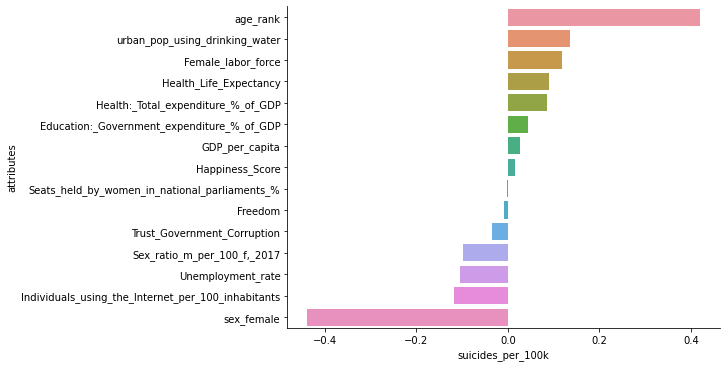

In [42]:
sns.catplot(x = 'suicides_per_100k', y = 'attributes', data = df_corr, kind = 'bar', aspect= 2)

As seen in the above graph, age is the most positively correlated factor. We will seperate age column into bins in order to create a graph that shows this positive correlation. 

In [43]:
df['age_bin'] = pd.cut(df.age_rank, bins = [0, 1, 2, 3, 4, 5, 6]) 

/Users/rossurbina/.conda/envs/ENVIRONMENT/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


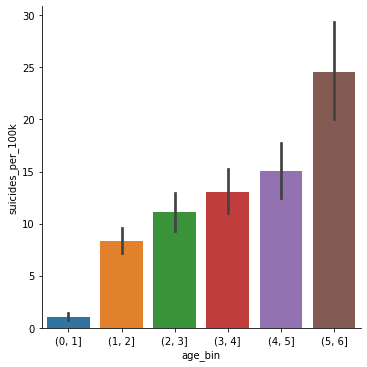

In [44]:
sns.catplot(x = 'age_bin', y = 'suicides_per_100k', data = df, kind = 'bar')

There are hardly any suicides in the 5-14 age category, and there are the most suicides in the 75+ group. There is a steady increase between the middle 4 rankings

In [45]:
df.drop(columns = 'age_bin', inplace = True)

/Users/rossurbina/.conda/envs/ENVIRONMENT/lib/python3.7/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


As seen in the graph of correlations, being female is the most negatively correlated attribute, so we will create a graph to show that men have higher suicide rates. 

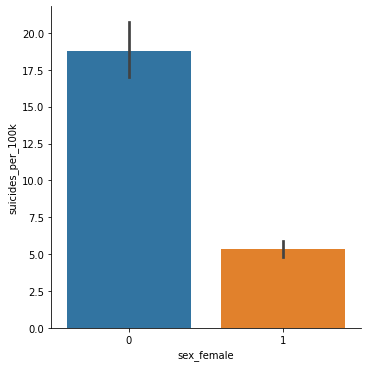

In [46]:
sns.catplot(x = 'sex_female', y = 'suicides_per_100k', data = df2, kind = 'bar')

We would would like to examine the countries with the most suicides. We will create a new series sorted into the top 5 suicide numbers by country before turning that series into a dataframe which we can use to graph the top 5.

In [47]:
top5 = df.suicides_per_100k.sort_values(ascending = False).head(5)
top5 = top5.to_frame().reset_index()
top5

,country,suicides_per_100k
0,Republic of Korea,140.741557
1,Slovenia,99.446628
2,Hungary,91.424316
3,Lithuania,84.094789
4,Serbia,82.624757


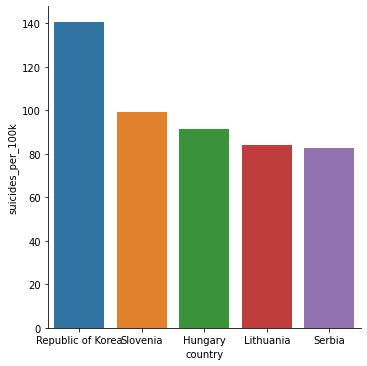

In [48]:
sns.catplot(x = 'country', y = 'suicides_per_100k', data = top5, kind = 'bar')

The Republic of Korea has significantly more suicides per 100k than any other countries, with almost 50% more than the country with the 2nd highest suicide rate

### Regression Analysis

Drop the NaN values from our dataset. Note: we did this after correlations because NaN values are okay for correlation, so it gives more data to work with. 

In [49]:
df2 = df2.dropna()

In [50]:
df2

,sex_female,suicides_per_100k,age_rank,Happiness_Score,Health_Life_Expectancy,Freedom,Trust_Government_Corruption,GDP_per_capita,Unemployment_rate,Female_labor_force,Health:_Total_expenditure_%_of_GDP,Education:_Government_expenditure_%_of_GDP,Seats_held_by_women_in_national_parliaments_%,Individuals_using_the_Internet_per_100_inhabitants,urban_pop_using_drinking_water,"Sex_ratio_m_per_100_f,_2017","GDP_growth_rate_annual_%,_const._2005_prices",energy_supply_per_capita
country,,,,,,,,,,,,,,,,,,
Argentina,1,4.507688,2.0,6.650,0.69711,0.42284,0.07296,14564.5,6.5,48.6,4.8,5.3,38.9,256.0,96.2,95.9,2.4,99.0
Argentina,1,3.523323,3.0,6.650,0.69711,0.42284,0.07296,14564.5,6.5,48.6,4.8,5.3,38.9,256.0,96.2,95.9,2.4,99.0
Argentina,1,3.131267,4.0,6.650,0.69711,0.42284,0.07296,14564.5,6.5,48.6,4.8,5.3,38.9,256.0,96.2,95.9,2.4,99.0
Argentina,1,0.535329,1.0,6.650,0.69711,0.42284,0.07296,14564.5,6.5,48.6,4.8,5.3,38.9,256.0,96.2,95.9,2.4,99.0
Argentina,1,3.550351,5.0,6.650,0.69711,0.42284,0.07296,14564.5,6.5,48.6,4.8,5.3,38.9,256.0,96.2,95.9,2.4,99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uruguay,0,40.747548,3.0,6.545,0.72183,0.54388,0.21394,15573.8,8.8,55.6,8.6,4.4,20.2,106.0,96.6,93.5,1.0,100.
Uruguay,0,31.842401,4.0,6.545,0.72183,0.54388,0.21394,15573.8,8.8,55.6,8.6,4.4,20.2,106.0,96.6,93.5,1.0,100.
Uruguay,0,1.188076,1.0,6.545,0.72183,0.54388,0.21394,15573.8,8.8,55.6,8.6,4.4,20.2,106.0,96.6,93.5,1.0,100.


Import necessary libraries

In [51]:
%pylab inline
import sklearn as sk

Populating the interactive namespace from numpy and matplotlib


Create the X dataframe, which contains all but the suicide per 100k column.

In [52]:
X = df2.drop('suicides_per_100k',axis=1)

 Create the Y series, which only contains the suicide number column. Also, create the X2 dataframe, which is a replica of X, that will be used later

In [53]:
X2 = X

In [54]:
Y = df2.suicides_per_100k

Import necesarry libraries

In [55]:
from sklearn import linear_model

Create the Lasso and fit it, which can be used for the regression analysis

In [56]:
regLasso = linear_model.Lasso()

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

In [59]:
regLasso.fit(X_train,Y_train)

Lasso()

Predict the value of Y based on our regressor model

In [60]:
y_pred = regLasso.predict(X_test)

Mean absolute error: Find the average of the difference between the prediction and real values

In [61]:
(y_pred - Y_test).abs().mean()

7.656681865107951

Mean Absolute Deviation: find the average of the square root of the difference between prediction and real values

In [62]:
((y_pred - Y_test)**2).mean()

145.2679656493442

import needed regression libraries

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

regs = [LinearRegression(), ElasticNet(), DecisionTreeRegressor(), GradientBoostingRegressor(), MLPRegressor()]#, SVR()]

In [64]:
from sklearn.model_selection import KFold

Go through the necessary steps to find the minMad

In [65]:
minMAD = 10000000
for reg in regs:
    kf = KFold(random_state=0,shuffle=True)
    mad = sk.model_selection.cross_val_score(reg,X,Y,\
             cv=kf,scoring='neg_mean_absolute_error').mean()
    # need the lowest scoring for mad
    print (str(reg)[:25] + ' with mad= ' + str(mad) )
    if mad < minMAD:
        minMAD = mad
        bestREG = reg
        
print('***********************************************')
print ('Best Regressor is... ' + str(bestREG)[:25] )
print('**********************')
print ('With MAD Score ' + str(minMAD))

LinearRegression() with mad= -7.325262959190139
ElasticNet() with mad= -7.831543263735343
DecisionTreeRegressor() with mad= -5.178660444988266
GradientBoostingRegressor with mad= -4.209675641776676


/Users/rossurbina/.conda/envs/ENVIRONMENT/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/rossurbina/.conda/envs/ENVIRONMENT/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor() with mad= -10.482329598906308
***********************************************
Best Regressor is... MLPRegressor()
**********************
With MAD Score -10.482329598906308


/Users/rossurbina/.conda/envs/ENVIRONMENT/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Create a new variable for minMAD for clearer wording

In [66]:
lowest_min_MAD = minMAD

In [67]:
lowest_min_MAD

-10.482329598906308

OVERALL LOGIC: Some columns may harm our overall min MAD, so we would get lower values without them. Find which columns harm the minMAD value, then create a new dataframe without them. Then, find the new minMAD with that

Create a new list for helpful columns, which we will input the helpful columns into

In [68]:
helpful_cols_max = []

Create a function that finds the minMAD value. Since we will be running this multiple times, it will be easier to read with just the function

The one difference from the above code (line 43) is that it has regr_fcn.minMAD. This is to extract each minMAD value to compare it to the lowest_min_MAD. 

In [69]:
def regr_fcn(X):
    minMAD = 10000000
    for reg in regs:
        kf = KFold(random_state=0,shuffle=True)
        mad = sk.model_selection.cross_val_score(reg,X,Y,\
                 cv=kf,scoring='neg_mean_absolute_error').mean()
        # need the lowest scoring for mad
        if mad < minMAD:
            minMAD = mad
            bestREG = reg
    regr_fcn.minMAD = minMAD
    print ('Best Regressor is' + str(bestREG)[:25] + 'With MAD Score ' + str(minMAD))

Create a list of the columns in X, allowing us to iterate through them

In [70]:
col = X.columns

Create a for loop that runs through all the columns in X. If the regression performs worse without that column than it did with all of the columns, then add it to the helpful columns list. This indicates that those columns are helpful attributes that make our prediction better.

Also, find the lowest_minMAD value, which indicates where the function performed the worse without that column (indicating it's the most helpful column). Save it as the lowest_MaxAUC variable. Start out with placeholder_minMAD being a value of -1000, and it will drop to the new value if regr_fcn.minMAD > placeholder_minMAD

In [71]:
placeholder_minMAD = -1000

In [72]:
for x in col:
    X = X.drop(x,axis=1)
    regr_fcn(X)
    if regr_fcn.minMAD > lowest_min_MAD:
        helpful_cols_max.append(x)
    if regr_fcn.minMAD > placeholder_minMAD:
        placeholder_minMAD = regr_fcn.minMAD
        lowest_minMAD = x
    X = X2

/Users/rossurbina/.conda/envs/ENVIRONMENT/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Best Regressor isDecisionTreeRegressor()With MAD Score -13.176153225763013


/Users/rossurbina/.conda/envs/ENVIRONMENT/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Best Regressor isMLPRegressor()With MAD Score -10.532449012662688


/Users/rossurbina/.conda/envs/ENVIRONMENT/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Best Regressor isMLPRegressor()With MAD Score -10.656607677593428
Best Regressor isMLPRegressor()With MAD Score -10.715604939361047


/Users/rossurbina/.conda/envs/ENVIRONMENT/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/rossurbina/.conda/envs/ENVIRONMENT/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Best Regressor isMLPRegressor()With MAD Score -10.12976815465628


/Users/rossurbina/.conda/envs/ENVIRONMENT/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Best Regressor isMLPRegressor()With MAD Score -10.339557668843653


/Users/rossurbina/.conda/envs/ENVIRONMENT/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/rossurbina/.conda/envs/ENVIRONMENT/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/rossurbina/.conda/envs/ENVIRONMENT/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/rossurbina/.conda/envs/ENVIRONMENT/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Op

Best Regressor isElasticNet()With MAD Score -7.823086068548212
Best Regressor isMLPRegressor()With MAD Score -10.523245447652078
Best Regressor isMLPRegressor()With MAD Score -10.90963618405149


/Users/rossurbina/.conda/envs/ENVIRONMENT/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Best Regressor isMLPRegressor()With MAD Score -10.929205003320536


/Users/rossurbina/.conda/envs/ENVIRONMENT/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/rossurbina/.conda/envs/ENVIRONMENT/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Best Regressor isMLPRegressor()With MAD Score -10.335625354158656


/Users/rossurbina/.conda/envs/ENVIRONMENT/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Best Regressor isMLPRegressor()With MAD Score -9.919604248214132


/Users/rossurbina/.conda/envs/ENVIRONMENT/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Best Regressor isMLPRegressor()With MAD Score -10.178008754617066


/Users/rossurbina/.conda/envs/ENVIRONMENT/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Best Regressor isMLPRegressor()With MAD Score -10.2815033505867


/Users/rossurbina/.conda/envs/ENVIRONMENT/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Best Regressor isMLPRegressor()With MAD Score -10.415913637028579
Best Regressor isMLPRegressor()With MAD Score -10.195953311919913


/Users/rossurbina/.conda/envs/ENVIRONMENT/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Best Regressor isMLPRegressor()With MAD Score -10.926016366166277


In [73]:
lowest_min_MAD

-10.482329598906308

In [74]:
lowest_minMAD

'GDP_per_capita'

Append the most helpful attribute (lowest_AUC) to the helpful columns list. This is to give it more weight with the classifier

In [75]:
helpful_cols_max.append(lowest_minMAD)

In [76]:
helpful_cols_max.append(lowest_minMAD)

In [77]:
helpful_cols_max

['Freedom',
 'Trust_Government_Corruption',
 'GDP_per_capita',
 'Education:_Government_expenditure_%_of_GDP',
 'Seats_held_by_women_in_national_parliaments_%',
 'Individuals_using_the_Internet_per_100_inhabitants',
 'urban_pop_using_drinking_water',
 'Sex_ratio_m_per_100_f,_2017',
 'GDP_growth_rate_annual_%,_const._2005_prices',
 'GDP_per_capita',
 'GDP_per_capita']

Create a new dataframe with just the helpful columns in it

In [78]:
X = X[helpful_cols_max]

Run the classifier code to find the lowest MinMAD value, and display the MinMAD and which regressor was used

In [79]:
minMAD = 10000000
for reg in regs:
    kf = KFold(random_state=0,shuffle=True)
    mad = sk.model_selection.cross_val_score(reg,X,Y,\
             cv=kf,scoring='neg_mean_absolute_error').mean()
    # need the lowest scoring for mad
    print (str(reg)[:25] + ' with mad= ' + str(mad) )
    if mad < minMAD:
        minMAD = mad
        bestREG = reg
        
print('***********************************************')
print ('Best Regressor is... ' + str(bestREG)[:25] )
print('**********************')
print ('With MAD Score ' + str(minMAD))

LinearRegression() with mad= -9.89363524478025
ElasticNet() with mad= -9.897461955062806
DecisionTreeRegressor() with mad= -9.877602613735323
GradientBoostingRegressor with mad= -9.854831091937221
MLPRegressor() with mad= -11.19796806589371
***********************************************
Best Regressor is... MLPRegressor()
**********************
With MAD Score -11.19796806589371


Most of the time the helpful columns will produce a better result, but sometimes the original value produces a better result. Compare the 2 and output the best one:

In [80]:
helpful_cols_regr = minMAD

In [81]:
if helpful_cols_regr < lowest_min_MAD:
    regr_final_answer = helpful_cols_regr
else: 
    regr_final_answer = lowest_min_MAD

In [82]:
regr_final_answer

-11.19796806589371

### Decision Tree

In [83]:
import sklearn.tree
import sklearn.tree as tree

Since we changed the value of X for regression analysis, put it back to its original value throught he duplicate we made

In [84]:
X = X2

Fit the decision tree, then run the code to output a decision tree with 2 as its depth

In [85]:
dt = sklearn.tree.DecisionTreeRegressor(max_depth = 2)

In [86]:
dt.fit(X,Y)


DecisionTreeRegressor(max_depth=2)

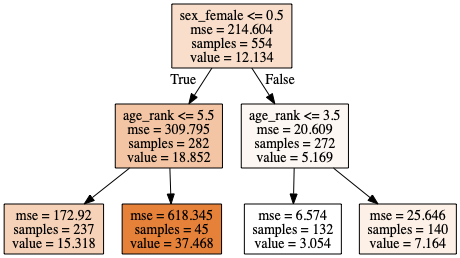

In [87]:
from IPython.display import Image  
import pydotplus

dt_feature_names = list(X.columns)
dt_target_names = np.array(Y.unique(),dtype=np.string_) 
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

This decision tree shows that males are more likely to commit suicides than women are, with a difference in number of 18.8 and 5.2. For men, the biggest age divide is between rank 5 and 6 (above/below 75 years old), with a difference in value of 15.3 and 37.5. For women, the biggest age divide is between rank 4 and 5 (above/below 35), with a difference in value of 3 and 7.2. 